<a href="https://colab.research.google.com/github/MartNMwangi/PythonProject/blob/main/Credit_Card_Detection_App_by_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd #data processing
import seaborn as sns
import matplotlib.pyplot as plt
# !pip install streamlit
# import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Install imblearn
!pip install imblearn

# Import SMOTE
from imblearn.over_sampling import SMOTE

# Import necessary metrics
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

#Loading dataset
df = pd.read_csv('drive/MyDrive/Data Sets/card_transdata.csv')
df.head(15)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.columns)

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')


In [ ]:
df.info

<bound method DataFrame.info of         distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715              1.0        0.0   
3                             0.362663              1.0        1.0   
4                             2.222767              1.0        1.0   
...                                ...              ...        ...   
999995                        1.626798              1.0        1.0   
999996                        2.778303              1.0        1.0   
999997                        0.218075              1.0        1.0   
999998                        0.475822              1.0        0.0   
999999                        0.386920              1.0        1.0   

        used_pin_number  online_order  fraud  
0                   0.0           0.0    0.0  
1                   0.0           0.0    0.0  
2                   0.0           1.0    0.0  
3                   0.0           1.0    0.0  
4                   0.0           1.0    0.0  
...                 ...           ...    ...  
999995              0.0           0.0    0.0  
999996              0.0           0.0    0.0  
999997              0.0           1.0    0.0  
999998              0.0           1.0    0.0  
999999              0.0           1.0    0.0  

[1000000 rows x 8 columns]>

In [ ]:
df.shape

(1000000, 8)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
boolean_feats = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
target = 'fraud'

<function matplotlib.pyplot.show(close=None, block=None)>

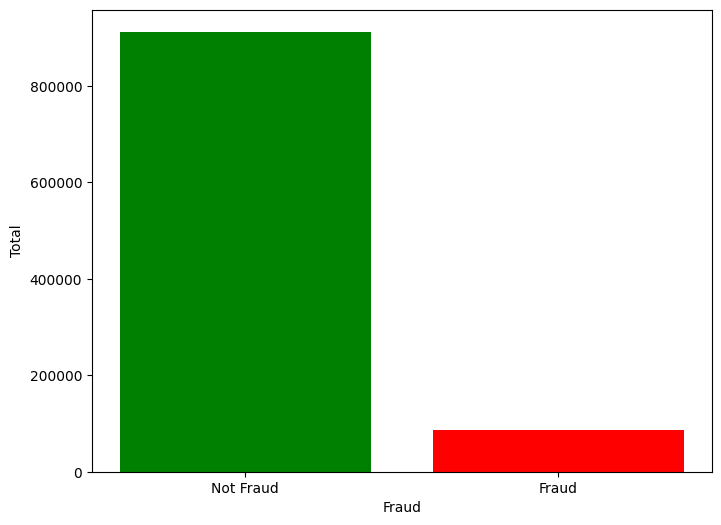

In [ ]:
#Create a bar chart to visualize the distribution of fraudulent (1) and non-fraudulent (0) transactions in the dataset
plt.figure(figsize=(8, 6))
plt.bar(['Not Fraud', 'Fraud'], df['fraud'].value_counts().values, color=['Green', 'Red'])
plt.xlabel('Fraud')
plt.ylabel('Total')
plt.show

In [ ]:
df['fraud'].value_counts()

,count
fraud,
0.0,912597
1.0,87403


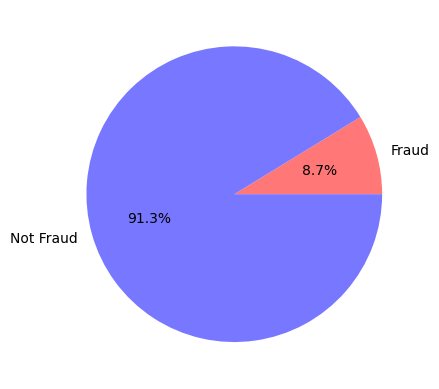

In [ ]:
f_count = df[df["fraud"] == 1]["fraud"].count()
nf_count = df[df["fraud"] == 0]["fraud"].count()
colors = ['#FF7777', '#7777FF']

plt.pie([f_count,nf_count],labels=['Fraud','Not Fraud'],autopct='%1.1f%%', colors = colors)
plt.show()

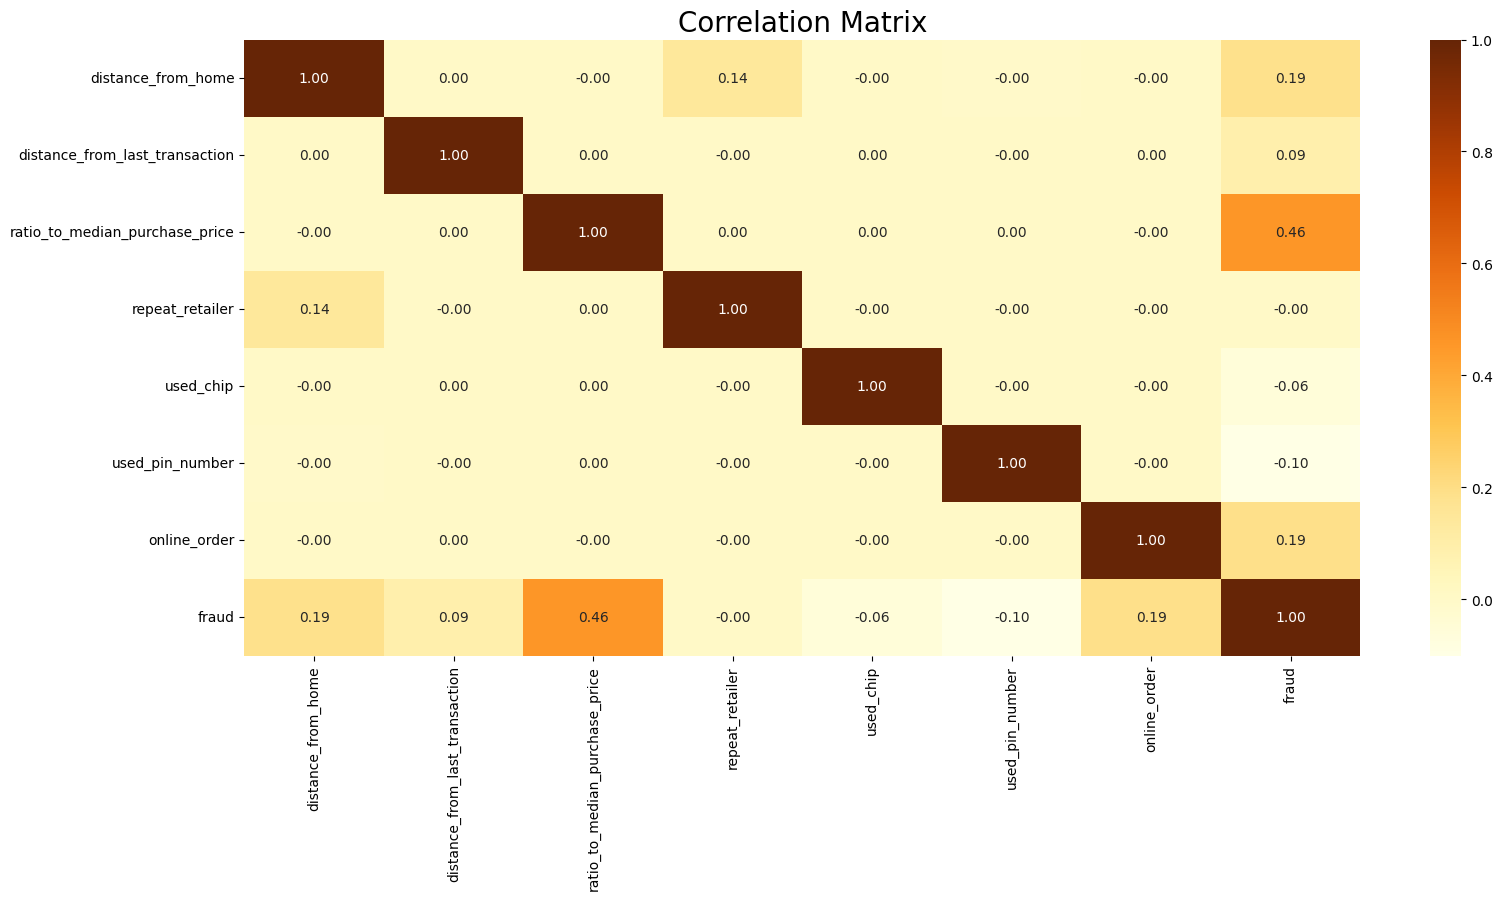

In [ ]:
corr = df.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(corr, annot=True, cmap='YlOrBr', fmt='.2f')
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [ ]:
#Pre-Processing
not_fraud = df[df['fraud'] == 0]
fraud = df[df['fraud'] == 1]

In [ ]:
fraud.shape, not_fraud.shape # use sample because of too much not fraud data

((87403, 8), (912597, 8))

In [ ]:
not_fraud_sample = not_fraud.sample(87403)
df = pd.concat([fraud, not_fraud_sample], axis=0)

In [ ]:
# sns.pairplot(df['distance_from_home'], hue='fraud')

In [ ]:
x = df.drop('fraud', axis=1)
y = df['fraud']

In [ ]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
#Normalize the features
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=20)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

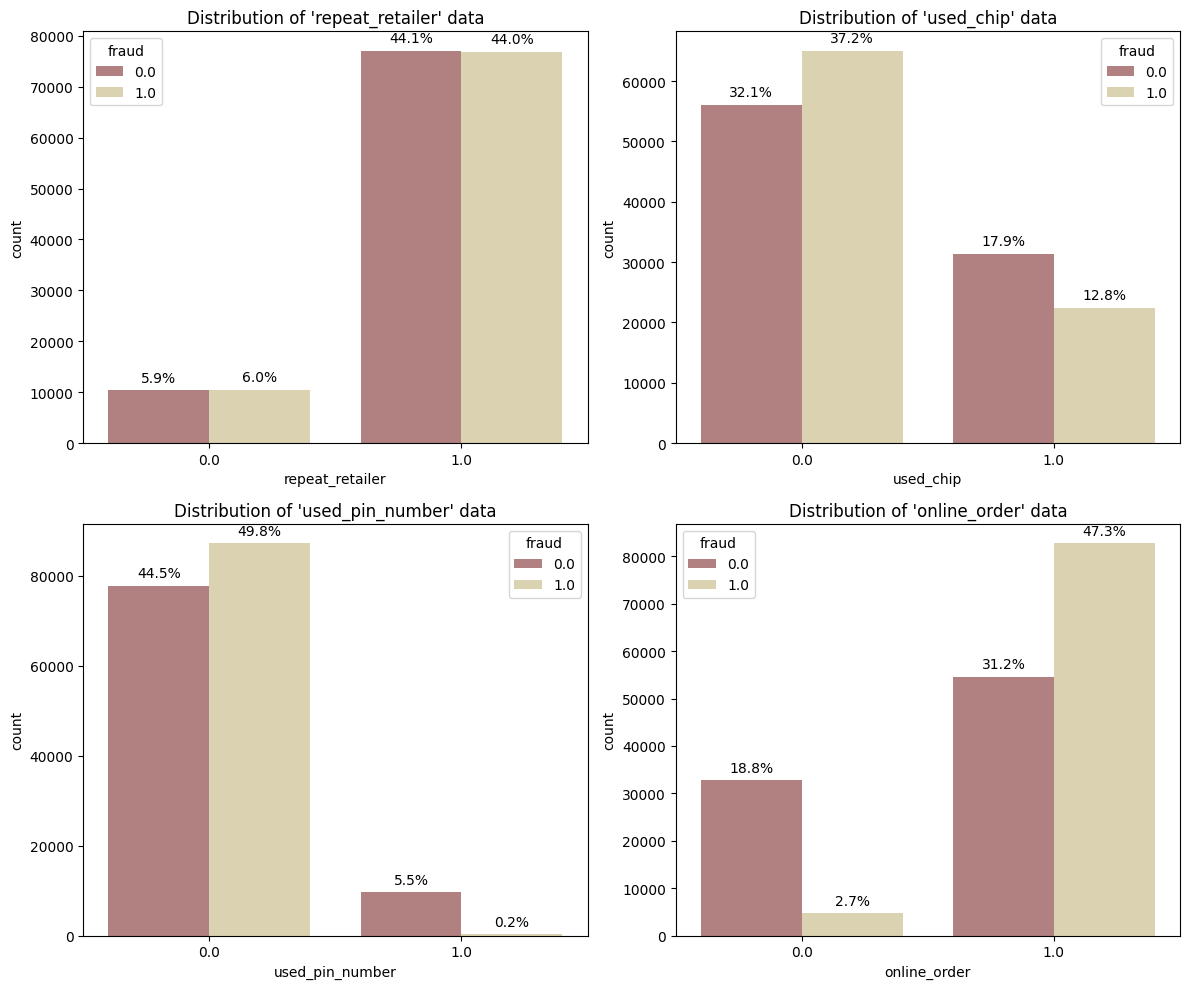

In [ ]:
plt.figure(figsize=(12,10))

for i, col in enumerate(boolean_feats, 1):
    plt.subplot(2, 2, i)
    plt.title(f"Distribution of '{col}' data")

    a = sns.countplot(x=df[col], hue = df[target], palette="pink")

    # Add percentages on top of the bars
    for p in a.patches:
        total = len(df)
        height = p.get_height()
        if height > 0 :  # Add percentage to non zero figures
            percentage = (height / total) * 100
            a.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

    # a.set_ylim(0, 100000)
    plt.tight_layout()

plt.show()

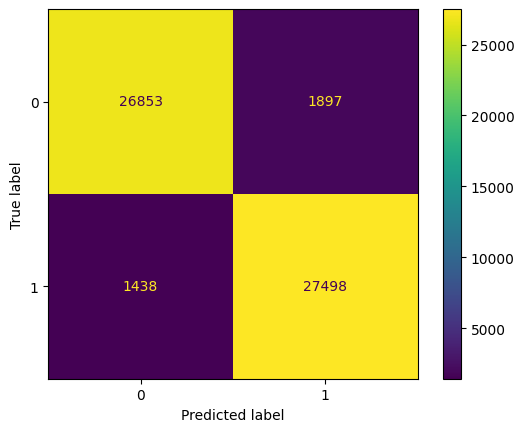

              precision    recall  f1-score   support

         0.0   0.949171  0.934017  0.941533     28750
         1.0   0.935465  0.950304  0.942826     28936

    accuracy                       0.942187     57686
   macro avg   0.942318  0.942161  0.942180     57686
weighted avg   0.942296  0.942187  0.942182     57686



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
clf = LogisticRegression()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_clf = clf.predict(X_test)

# Now you can create the confusion matrix
confusion_matrix_clf = confusion_matrix(y_test, y_pred_clf)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_clf)

disp.plot()
plt.show()


print(classification_report(y_test, y_pred_clf, digits=6))

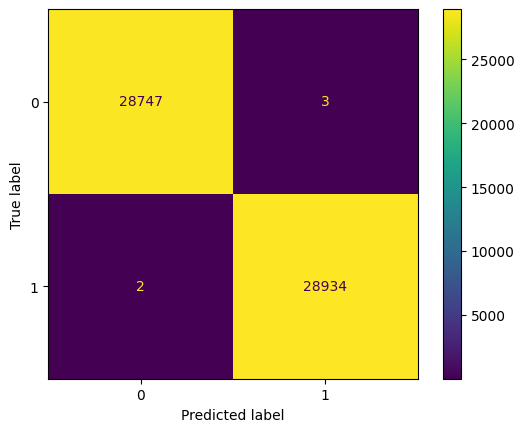

In [ ]:
decision_tree = DecisionTreeClassifier()

# Train the classifier
decision_tree.fit(X_train, y_train)


# Make predictions on the test data
y_pred_clf = decision_tree.predict(X_test)

# Now you can create the confusion matrix
confusion_matrix_clf = confusion_matrix(y_test, y_pred_clf)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_clf)

disp.plot()

plt.show()

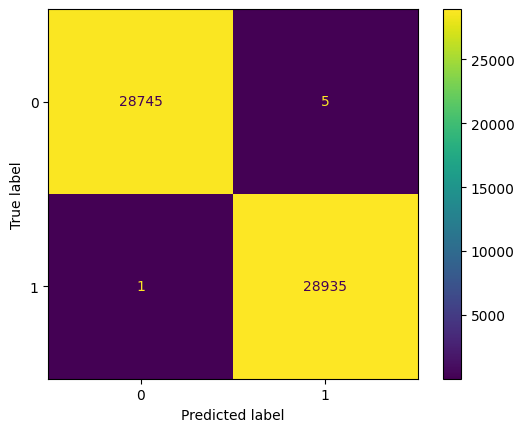

In [ ]:
random_forest = RandomForestClassifier(n_estimators=90, random_state=20)

# Train the classifier
random_forest.fit(X_train, y_train)


# Make predictions on the test data
y_pred_clf = random_forest.predict(X_test)

# Now you can create the confusion matrix
confusion_matrix_clf = confusion_matrix(y_test, y_pred_clf)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_clf)

disp.plot()

plt.show()

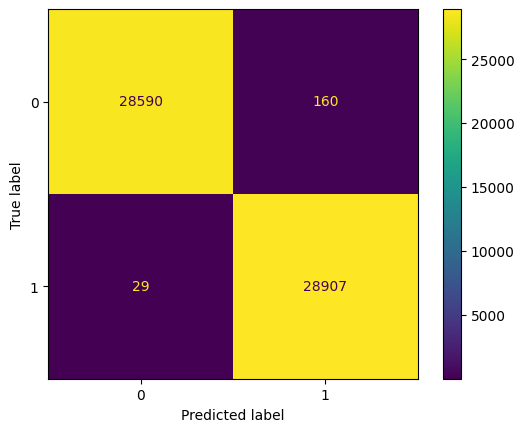

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)


# Make predictions on the test data
y_pred_clf = knn.predict(X_test)

# Now you can create the confusion matrix
confusion_matrix_clf = confusion_matrix(y_test, y_pred_clf)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_clf)

disp.plot()

plt.show()

In [ ]:
classification_model = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=3),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=90, random_state=20),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

LogisticRegression accuracy: 0.94
KNeighborsClassifier accuracy: 1.00
RandomForestClassifier accuracy: 1.00
DecisionTreeClassifier accuracy: 1.00


<ipython-input-126-409b4a698757>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='accuracy', data=models, palette='BuPu')


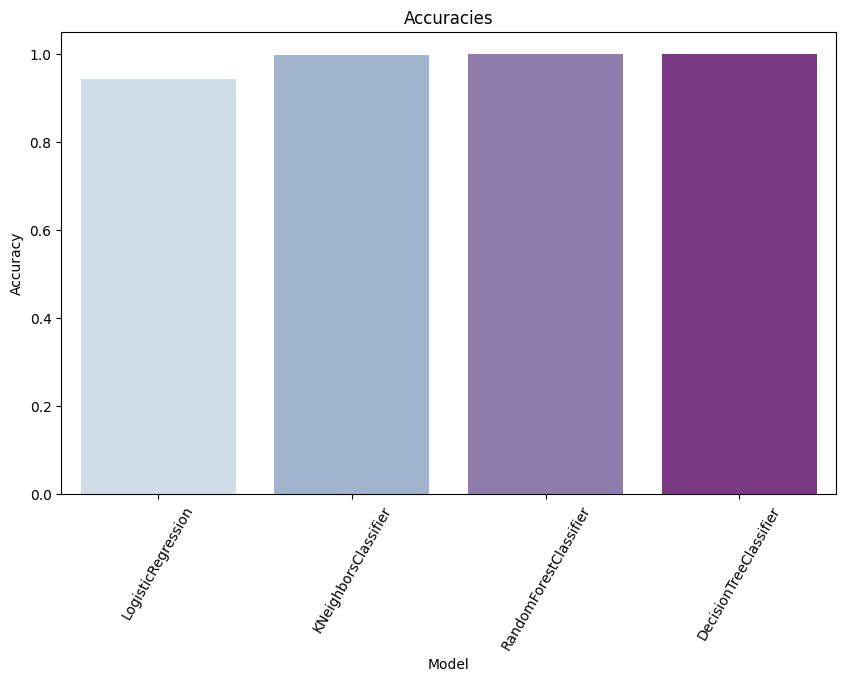

In [ ]:
model_names =  []
accuracies = []

for name, clf in classification_model.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f'{name} accuracy: {score:.2f}')


models = pd.DataFrame({'model': model_names, 'accuracy': accuracies})

plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='accuracy', data=models, palette='BuPu')
plt.title('Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=60)
plt.show()

In [ ]:
print(models)

                    model  accuracy
0      LogisticRegression  0.942187
1    KNeighborsClassifier  0.996724
2  RandomForestClassifier  0.999896
3  DecisionTreeClassifier  0.999879


In [ ]:
# for model_name, (y_pred, y_prob) in models.items():
#     print(f"### {model_name} Evaluation:")
#     print("Classification Report:")
#     print(classification_report(y_test, y_pred))
#     roc_auc = roc_auc_score(y_test, y_prob)
#     print(f"ROC-AUC Score: {roc_auc:.4f}")

#     # Confusion Matrix Visualization
#     conf_matrix = confusion_matrix(y_test, y_pred)
#     print(f"{model_name} Confusion Matrix:")
#     fig, ax = plt.subplots(figsize=(6, 4))
#     sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", ax=ax)

In [ ]:
import pickle

with open('KNN.pkl', 'wb') as file:
    pickle.dump(knn, file)

with open('random_forest.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

with open('decision_tree.pkl', 'wb') as file:
    pickle.dump(decision_tree, file)


In [ ]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Taking input from the user - number inputs for numbers, selectbox for the rest

In [ ]:
distance_from_home = 57.877857
distance_from_last_transaction = 0.311140
ratio_to_median_purchase_price = 1.945940


repeat_retailer = "Yes"
if repeat_retailer == "Yes":
  repeat_retailer = 1.0
else:
  repeat_retailer = 0.0

used_chip = "Yes"
if used_chip == "Yes":
  used_chip = 1.0
else:
  used_chip = 0.0

used_pin_number = "Yes"
if used_pin_number == "Yes":
  used_pin_number = 1.0
else:
  used_pin_number = 0.0

online_order = "No"

if online_order == "Yes":
  online_order = 1.0
else:
  online_order = 0.0


# converting to a pandas dataframe

# user_data = pd.DataFrame({
#     'distance_from_home': [distance_from_home],
#     'distance_from_last_transaction': [distance_from_last_transaction],
#     'ratio_to_median_purchase_price': [ratio_to_median_purchase_price],
#     'repeat_retailer': [repeat_retailer],
#     'used_chip': [used_chip],
#     'used_pin_number': [used_pin_number],
#     'online_order': [online_order]
# })

# print(type(user_data))

input_data = np.array([[distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order]]).reshape(1, -1)

print(input_data)

[[57.877857  0.31114   1.94594   1.        1.        1.        0.      ]]


Scaling

In [ ]:
# with open('scaler.pkl', 'rb') as file:
#     scaler = pickle.load(file)

scaled_data = scaler.fit_transform(input_data)


In [ ]:
scaled_data

array([[0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
import streamlit as st
from sklearn.preprocessing import StandardScaler
from PIL import Image  # For loading images
import pickle
import numpy as np


# Chatbot logic
def chatbot_response(user_input):
  responses = {
    "hello": "Hi! How can I assist you with fraud detection today?",
    "how does this work": "This app predicts whether a transaction is fraudulent based on inputs you provide.",
    "what is distance from home": "Distance from home refers to the physical distance between the user's home and where the transaction occurred.",
    "what is distance from last transaction": "Distance from last transaction refers to the distance between the current transaction location and the location of the previous transaction.",
    "what is ratio to median purchase price": "This is the ratio of the transaction's purchase price to the median purchase price for similar transactions.",
    "what is repeat retailer": "Repeat retailer indicates whether the transaction occurred at a retailer the user has previously visited.",
    "what is used chip": "This feature indicates whether the transaction was completed using a credit card chip.",
    "what is used pin number": "This refers to whether a PIN number was used to authorize the transaction.",
    "what is online order": "This feature checks whether the transaction was made through an online order or at a physical store.",
    "what is fraud": "Fraud refers to whether the transaction was fraudulent or not, with 1 indicating a fraud and 0 meaning no fraud.",
    "thank you": "You're welcome! Let me know if you have more questions."
  }
  default_response = "I'm sorry, I didn't understand that. Please ask about the app or fraud detection inputs."
  return responses.get(user_input.lower(), default_response)

def main():
    # Set custom background color and title
    st.markdown("""
        <style>
            .report view-container {
                background-color: #f4f4f9;
            }
            .sidebar .sidebar-content {
                background-color: #80deea;
            }
            .stButton>button {
                background-color: #ff8a65;
                color: white;
                font-size: 18px;
            }
        </style>
    """, unsafe_allow_html=True)

    st.title('Credit Card Fraud Detection App')

    # Load custom image for the header or intro
    img = Image.open("/Users/MacBook/Downloads/cards.jpg")
    st.image(img, use_column_width=True)

def main():
  with open('Models/decision_tree (1).pkl', 'rb') as file:
      knn = pickle.load(file)
  st.title('Credit Card Fraud Detection App')

  #Create layout with columns
  col1,col2=st.columns([3,1])
  with col1:

    distance_from_home = st.number_input('Distance from home',0,11000)
    distance_from_last_transaction = st.number_input('Distance from last transaction',0,11000)
    ratio_to_median_purchase_price = st.number_input('Ratio to median purchase price',0,300)
    repeat_retailer = st.selectbox('Repeat retailer', ['Yes', 'No'])
    used_chip = st.selectbox('Used chip', ['Yes', 'No'])
    used_pin_number = st.selectbox('Used pin number', ['Yes', 'No'])
    online_order = st.selectbox('Online order', ['Yes', 'No'])

    # Convert categorical variables to numerical values
    if repeat_retailer == "Yes":
      repeat_retailer = 1.0
    else:
      repeat_retailer = 0.0

    if used_chip == "Yes":
      used_chip = 1.0
    else:
      used_chip = 0.0

    if used_pin_number == "Yes":
      used_pin_number = 1.0
    else:
      used_pin_number = 0.0

    if online_order == "Yes":
      online_order = 1.0
    else:
      online_order = 0
    if st.button('Make Predictions'):

      input_data = np.array([[distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order]]).reshape(1, -1)

      prediction = knn.predict(input_data)

      if prediction == 1:
        st.write('Fraud')
      elif prediction == 0:
        st.write('Not Fraud')
  with col2:
    st.write('Chatbot')

    # Chatbot conversation
    user_input = st.text_input("Ask me anything:", "")
    if user_input:
      response = chatbot_response(user_input)
      st.write(response)

if __name__=='__main__':
  st.set_page_config(
    page_title='Credit Card Detection',
    layout="wide"
  )
  main()

ModuleNotFoundError: No module named 'streamlit'